In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxes
from astropy.coordinates import SkyCoord
import os
from scipy import ndimage
from astropy.stats import sigma_clip
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from lightkurve import MPLSTYLE

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 13.28952322672  67.496175342705  
CRPIX : 6.013206462361  5.9916128596239  
PC1_1 PC1_2  : 0.002944063813397  -0.0048576159194211  
PC2_1 PC2_2  : 0.0046130878845649  0.0029528343634717  
CDELT : 1.0  1.0  
NAXIS : 11  11


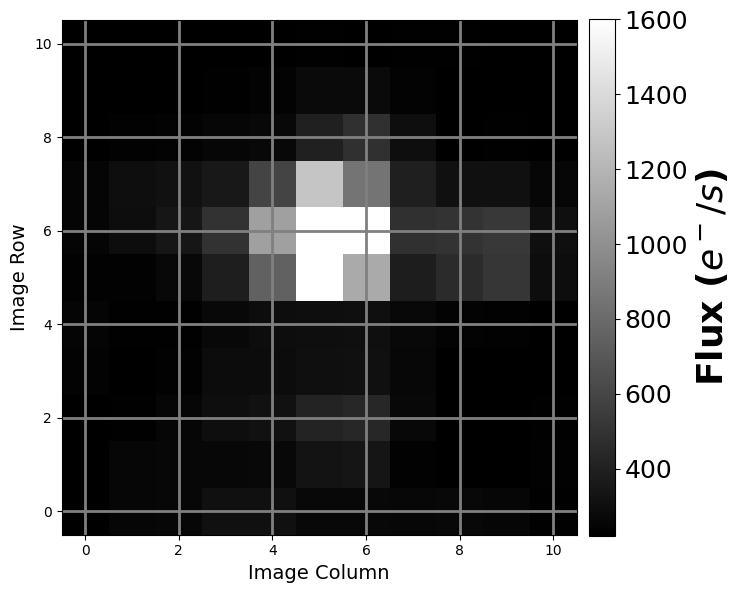

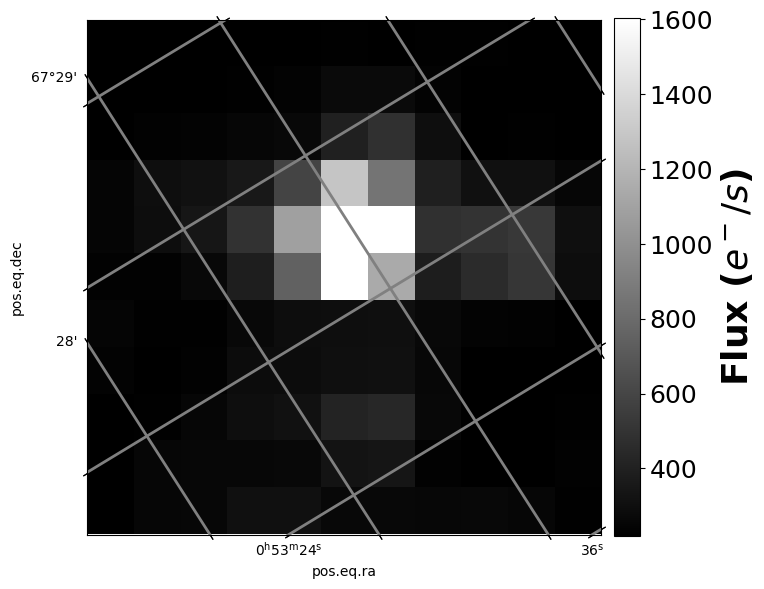

In [319]:
#TESScut

os.chdir('/users/ben/desktop/LSR/fits_files')
hdu1=fits.open('small_pa30_tesscut.fits')
wcs1 = WCS(hdu1[2].header)
print(wcs1)
Ra_obj = wcs1.wcs.crval[0] 
Dec_obj = wcs1.wcs.crval[1]


def plot_cutout(image):
    """
    Plot image and add grid lines.
    """
    plt.imshow(image, origin = 'lower', cmap = plt.cm.gist_yarg_r, vmax = np.percentile(image, 98),vmin = np.percentile(image, 5))


    plt.grid(axis = 'both',color = 'gray', ls = 'solid', lw=2)
    cb = plt.colorbar(shrink=0.84, pad=0.02 )
    cb.ax.tick_params(labelsize=18)
    cb.set_label( label=r'Flux ($e^-/s$)', size=26, weight='bold')


firstImage = hdu1[1].data['FLUX'][1000]


fig = plt.figure(figsize=(8, 8))
plot_cutout(firstImage)
plt.xlabel('Image Column',fontsize = 14)
plt.ylabel('Image Row',fontsize = 14)
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()


fig = plt.figure(figsize = (8, 8))
fig.add_subplot(111, projection = wcs1)
plot_cutout(firstImage)#(aperture_mask=np.array(hdu[2].data))
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()


#targetstar = wcs1.all_world2pix([[Ra_obj, Dec_obj]],1,maxiter=20, tolerance=1.0e-4, adaptive=False, detect_divergence=False, quiet=False)
#plt.scatter(starloc[0,0], starloc[0,1],s = 100,color = 'magenta', marker='d')


 [astropy.io.fits.verify]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
Changed DATE-OBS from '1991/09/17        ' to '1991-09-17T00:00:00.0''. [astropy.wcs.wcs]


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 11.667552613888887  65.32634288055556  
CRPIX : 2480.5006816203313  -7556.4993153526775  
PC1_1 PC1_2  : 0.01502881640964812  3.4299963928366195e-05  
PC2_1 PC2_2  : -3.598616675856972e-05  0.015000560179223497  
CDELT : -0.01864887381609977  0.01864887381609977  
NAXIS : 475  476


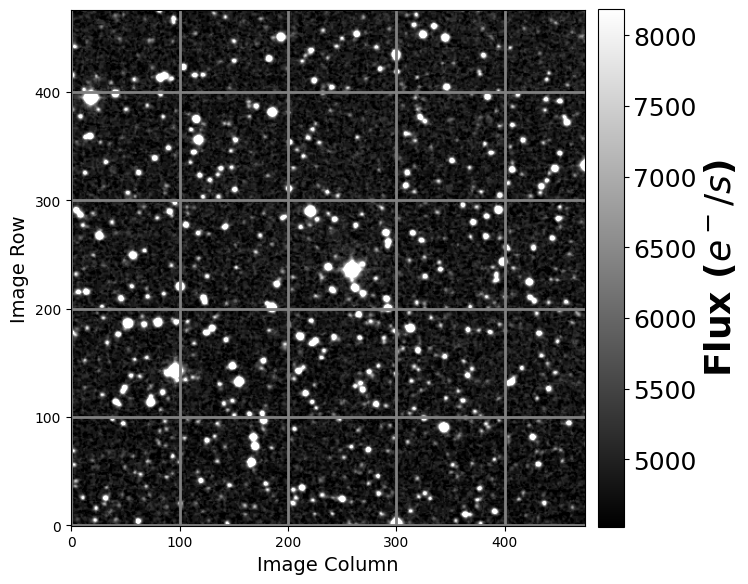

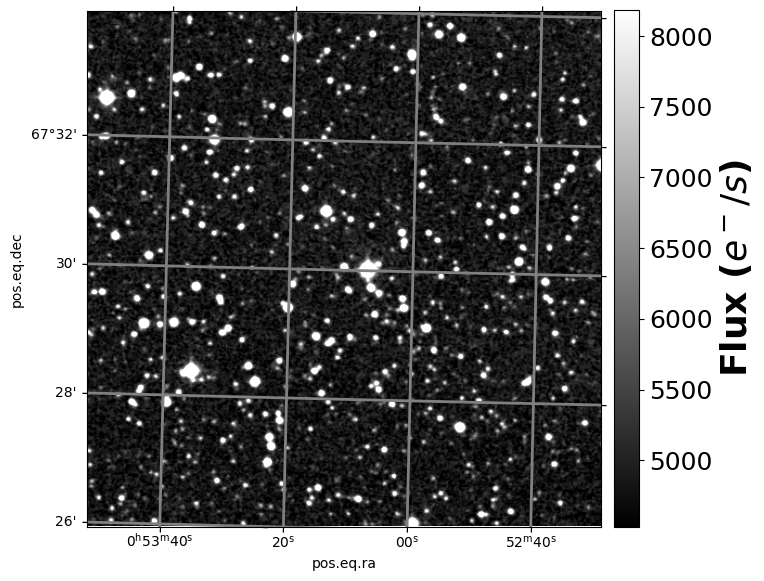

In [320]:
#DSScut

os.chdir('/users/ben/desktop/LSR/fits_files')
hdu2=fits.open('small_pa30_dsscut.fits')
wcs2 = WCS(hdu2[0].header)
print(wcs2)
Ra_obj = wcs1.wcs.crval[0] 
Dec_obj = wcs1.wcs.crval[1] 


def plot_cutout(image):
    """
    Plot image and add grid lines.
    """
    plt.imshow(image, origin = 'lower', cmap = plt.cm.gist_yarg_r, 
           vmax = np.percentile(image, 98),
           vmin = np.percentile(image, 5))

    plt.grid(axis = 'both',color = 'gray', ls = 'solid', lw=2)
    cb = plt.colorbar(shrink=0.84, pad=0.02 )
    cb.ax.tick_params(labelsize=18)
    cb.set_label( label=r'Flux ($e^-/s$)', size=26, weight='bold')


firstImage = hdu2[0].data


fig = plt.figure(figsize=(8, 8))
plot_cutout(firstImage)
plt.xlabel('Image Column',fontsize = 14)
plt.ylabel('Image Row',fontsize = 14)


fig = plt.figure(figsize = (8, 8))
fig.add_subplot(111, projection = wcs2)
plot_cutout(firstImage)#(aperture_mask=np.array(hdu[2].data))


#targetstar = wcs2.all_world2pix([[Ra_obj, Dec_obj]],1,maxiter=20, tolerance=1.0e-4, adaptive=False, detect_divergence=False, quiet=False)
#plt.scatter(starloc[0,0], starloc[0,1],s = 100,color = 'magenta', marker='d')


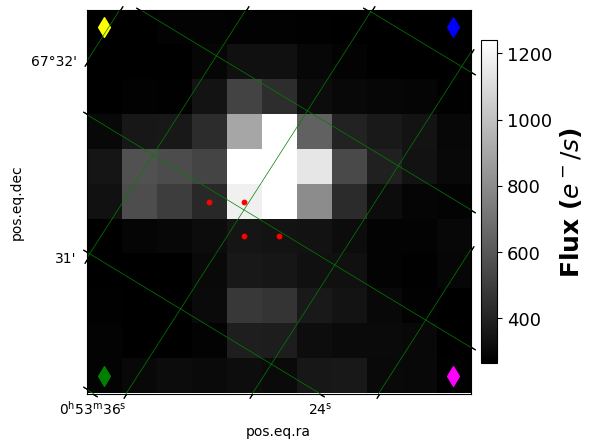

In [338]:
#TESScut image with four corner markers

image = hdu1[1].data['FLUX'][500]

fig = plt.figure()#figsize = (8, 8))
ax = WCSAxes(fig, [0.1, 0.1, 0.8, 0.8], wcs = wcs1)
fig.add_axes(ax)
plt.imshow(image, origin = 'lower', cmap = plt.cm.gist_yarg_r, vmax = np.percentile(image, 97), vmin = np.percentile(image, 5))
plt.grid(axis = 'both',color = 'green', ls = 'solid', lw=0.5)
cb = plt.colorbar(shrink=0.84, pad=0.02 )
cb.ax.tick_params(labelsize=13)
cb.set_label( label=r'Flux ($e^-/s$)', size=18, weight='bold')

#targetstar = wcs1.all_world2pix([[Ra_obj, Dec_obj]],1,maxiter=20, tolerance=1.0e-4, adaptive=False, detect_divergence=False, quiet=False)
#plt.scatter(starloc1[0,0], starloc1[0,1],s = 100,color = 'c', marker='d')
plt.scatter(7, 5,s = 10,color = 'red', marker='o')
plt.scatter(6, 5,s = 10,color = 'red', marker='o')
plt.scatter(6, 4,s = 10,color = 'red', marker='o')
plt.scatter(5, 4,s = 10,color = 'red', marker='o')
#plt.scatter(5, 6,s = 10,color = 'red', marker='o')
#plt.scatter(13, 14,s = 10,color = 'red', marker='o')
#plt.scatter(13, 12,s = 10,color = 'red', marker='o')
#plt.scatter(13, 13,s = 10,color = 'red', marker='o')
#plt.scatter(0, 0,s = 100,color = 'magenta', marker='d')
#plt.scatter(0, 10,s = 100,color = 'blue', marker='d')
#plt.scatter(10, 0,s = 100,color = 'green', marker='d')
#plt.scatter(10, 10,s = 100,color = 'yellow', marker='d')
#plt.gca().invert_xaxis()

In [326]:
#from TESS pixel coordinates to sky coordinates to DSS pixel coordinates

starloc1 = wcs1.wcs_pix2world([[0,0],[0,0]],0)
starloc2 = wcs1.wcs_pix2world([[0,10],[0,10]],0)
starloc3 = wcs1.wcs_pix2world([[10,0],[10,0]],0)
starloc4 = wcs1.wcs_pix2world([[10,10],[10,10]],0)

dss_starloc1 = wcs2.all_world2pix([[starloc1[0,0], starloc1[0,1]]],1,maxiter=20, tolerance=1.0e-4, adaptive=False, detect_divergence=False, quiet=False)
dss_starloc2 = wcs2.all_world2pix([[starloc2[0,0], starloc2[0,1]]],1,maxiter=20, tolerance=1.0e-4, adaptive=False, detect_divergence=False, quiet=False)
dss_starloc3 = wcs2.all_world2pix([[starloc3[0,0], starloc3[0,1]]],1,maxiter=20, tolerance=1.0e-4, adaptive=False, detect_divergence=False, quiet=False)
dss_starloc4 = wcs2.all_world2pix([[starloc4[0,0], starloc4[0,1]]],1,maxiter=20, tolerance=1.0e-4, adaptive=False, detect_divergence=False, quiet=False)
#dss_starloc5 = wcs2.all_world2pix([[131.7227301139581, 17.87953960705426]],1,maxiter=20, tolerance=1.0e-4, adaptive=False, detect_divergence=False, quiet=False)

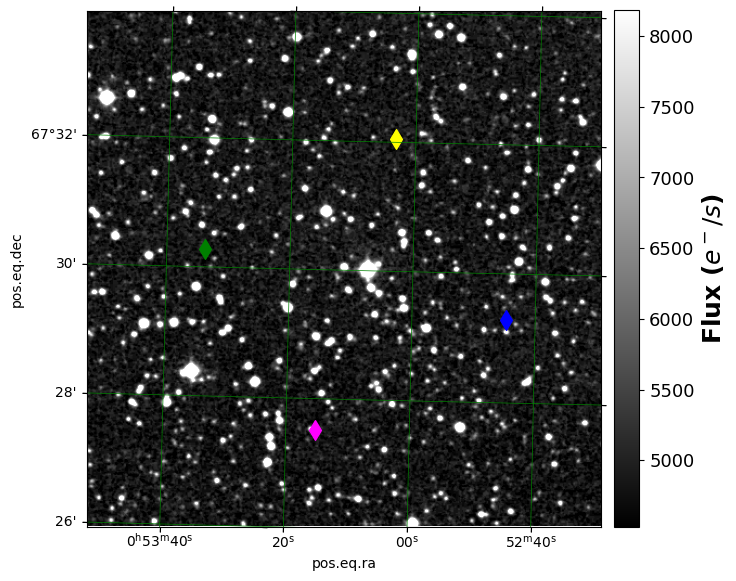

In [327]:
#DSScut image with four corner markers

image = hdu2[0].data
#rot_im = ndimage.rotate(image, 0)

fig = plt.figure(figsize = (8, 8))
fig.add_subplot(111, projection = wcs2)
#ax = WCSAxes(fig, [0.1, 0.1, 0.8, 0.8], wcs = wcs1)
#fig.add_axes(ax)
plt.imshow(image, origin = 'lower', cmap = plt.cm.gist_yarg_r, vmax = np.percentile(image, 98), vmin = np.percentile(image, 5))
plt.grid(axis = 'both',color = 'green', ls = 'solid', lw=0.5)
cb = plt.colorbar(shrink=0.84, pad=0.02 )
cb.ax.tick_params(labelsize=13)
cb.set_label( label=r'Flux ($e^-/s$)', size=18, weight='bold')

#starloc2 = wcs2.all_world2pix([[Ra_obj, Dec_obj]],1,maxiter=20, tolerance=1.0e-4, adaptive=False, detect_divergence=False, quiet=False)
#plt.scatter(starloc2[0,0], starloc2[0,1],s = 100,color = 'c', marker='d')
plt.scatter(dss_starloc1[0,0], dss_starloc1[0,1],s = 100,color = 'magenta', marker='d')
plt.scatter(dss_starloc2[0,0], dss_starloc2[0,1],s = 100,color = 'blue', marker='d')
plt.scatter(dss_starloc3[0,0], dss_starloc3[0,1],s = 100,color = 'green', marker='d')
plt.scatter(dss_starloc4[0,0], dss_starloc4[0,1],s = 100,color = 'yellow', marker='d')

------------ Plotting individual pixels ------------

In [330]:
fits_file = 'small_pa30_tesscut.fits'

In [331]:
hdu3=fits.open(fits_file)
wcs3 = WCS(hdu3[2].header)
wcs3

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 13.28952322672  67.496175342705  
CRPIX : 6.013206462361  5.9916128596239  
PC1_1 PC1_2  : 0.002944063813397  -0.0048576159194211  
PC2_1 PC2_2  : 0.0046130878845649  0.0029528343634717  
CDELT : 1.0  1.0  
NAXIS : 11  11

In [332]:
os.chdir('/users/ben/desktop/LSR/fits_files')
fits.info(fits_file)

Filename: small_pa30_tesscut.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      56   ()      
  1  PIXELS        1 BinTableHDU    280   3354R x 12C   [D, E, J, 121J, 121E, 121E, 121E, 121E, J, E, E, 38A]   
  2  APERTURE      1 ImageHDU        81   (11, 11)   int32   


In [333]:
fits.getdata(fits_file, ext=1).columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '121J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(11, 11)'
    name = 'FLUX'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11, 11)'
    name = 'FLUX_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11, 11)'
    name = 'FLUX_BKG'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11, 11)'
    name = 'FLUX_BKG_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11, 11)'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'FFI_FILE'; format = '38A'; unit = 'pixel'
)

In [334]:
with fits.open(fits_file, mode="readonly") as hdulist:
    time = hdulist[1].data['TIME']
    pdcsap = hdulist[1].data['FLUX']

In [339]:
target_pix_flux = []
for i in range(len(pdcsap)):
    #flux = pdcsap[i][np.int(wcs1.wcs.crpix[0])][np.int(wcs1.wcs.crpix[1])]
    flux = pdcsap[i][5][6]
    target_pix_flux.append(flux)

In [313]:
pix1 = []
for i in range(len(pdcsap)):
    flux = pdcsap[i][7][5]
    pix1.append(flux)
pix1 = np.array(pix1)

pix2 = []
for i in range(len(pdcsap)):
    flux = pdcsap[i][6][5]
    pix2.append(flux)
pix2 = np.array(pix2)

pix3 = []
for i in range(len(pdcsap)):
    flux = pdcsap[i][6][4]
    pix3.append(flux)
pix3 = np.array(pix3)

pix4 = []
for i in range(len(pdcsap)):
    flux = pdcsap[i][5][4]
    pix4.append(flux)
pix4 = np.array(pix4)

#pix5 = []
#for i in range(len(pdcsap)):
#    flux = pdcsap[i][12][14]
#    pix5.append(flux)
#pix5 = np.array(pix5)

#pix6 = []
#for i in range(len(pdcsap)):
#    flux = pdcsap[i][13][12]
#    pix6.append(flux)
#pix6 = np.array(pix6)

#pix7 = []
#for i in range(len(pdcsap)):
#    flux = pdcsap[i][13][13]
#    pix7.append(flux)
#pix7 = np.array(pix7)

#pix8 = []
#for i in range(len(pdcsap)):
#    flux = pdcsap[i][13][14]
#    pix8.append(flux)
#pix8 = np.array(pix8)

combined_pix_flux = pix1 + pix2 + pix3 + pix4# + pix5 + pix6 + pix7 + pix8

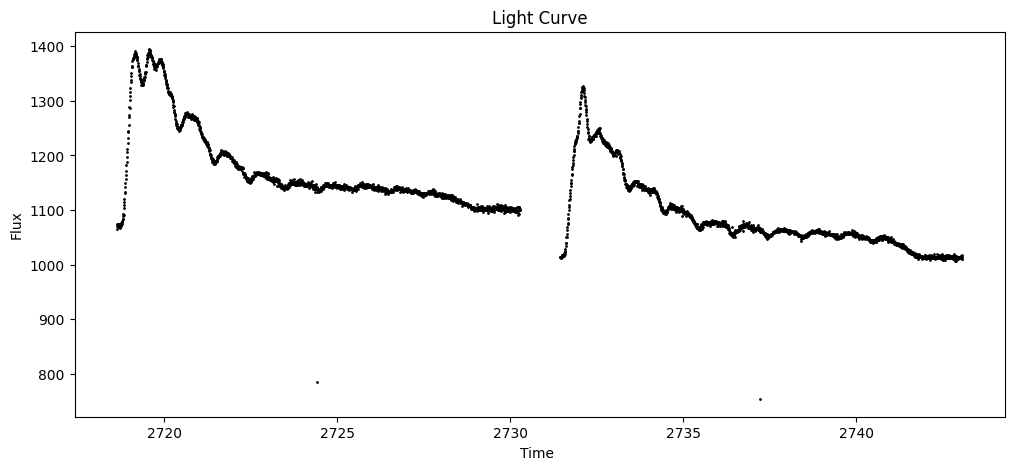

In [340]:
#clipped_flux = sigma_clip(combined_pix_flux, sigma=5)
clipped_flux = sigma_clip(target_pix_flux, sigma=5)

fig = plt.figure(figsize = (12, 5))
plt.scatter(time, clipped_flux, c = 'black', s=1)

plt.title("Light Curve")
plt.ylabel("Flux")
plt.xlabel("Time ")
#plt.ylim(1000,1700)
#plt.xlim(2522,2525)

plt.show()

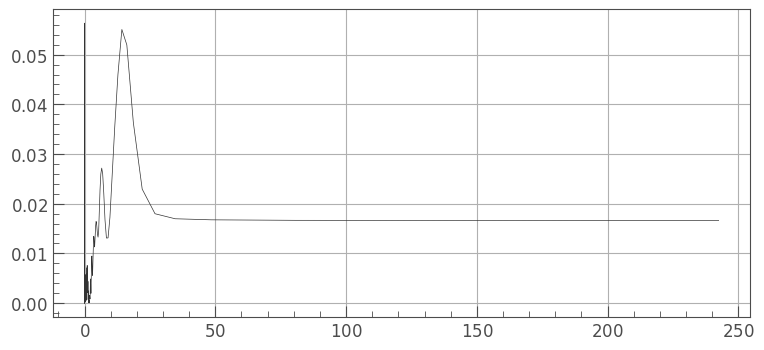

In [211]:
from astropy.timeseries import LombScargle

#plt.style.use('ggplot')

#fig, ax = plt.subplots()
#bin = 1
#binned_time = time[::bin]
#binned_flux = target_pix_flux[::bin]
frequency, power = LombScargle(time, clipped_flux).autopower()#method='chi2')
period = 1/frequency
#power = power*100

#ax.xaxis.set_major_locator(MultipleLocator(2))
#ax.xaxis.set_minor_locator(MultipleLocator(0.5))
#ax.yaxis.set_major_locator(MultipleLocator(2))
#ax.yaxis.set_minor_locator(MultipleLocator(1))
#ax.tick_params(labelsize=16)

with plt.style.context(MPLSTYLE):  
    ax = plt.figure(figsize=(9, 4)).gca()  
    plt.plot(period, power)  

#ax.set_xlim(0.01,1.25)
#ax.set_ylim(0,1)
#plt.xlim(0.01,10)
#ax.set_xscale('log')
plt.grid(axis = 'both')